In [1]:
import numpy as np
import pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pmt_info = pickle.load(open('/home/jpyanez/snoplus/snoplus_python/pmt_positions.pckl'))
pmt_radii = np.linalg.norm(pmt_info['xyz'], axis=1)
costheta = pmt_info['xyz'][:,2]/pmt_radii
phi      = np.arctan2(pmt_info['xyz'][:,1], 
                      pmt_info['xyz'][:,0])

In [113]:
type(pmt_info['xyz'])

numpy.ndarray

In [5]:
effective_n = 1.4
ch_angle = np.arccos(1/effective_n)
print 'Cherenkov angle', np.rad2deg(ch_angle)

Cherenkov angle 44.4153085972


In [107]:
direction = np.array([20., -10., -10])
normdir   = direction/np.linalg.norm(direction)
position  = np.array([0., 5000., 0.])
print 'Direction', normdir

Direction [ 0.81649658 -0.40824829 -0.40824829]


In [108]:
pmt_vectors = pmt_info['xyz']-position
pmt_vectors = (pmt_vectors/
               np.reshape(np.linalg.norm(pmt_vectors, axis=1), [pmt_vectors.shape[0],1]))

In [109]:
# Select only those that are in the direction of the vector
angles_to_track = np.arccos(np.dot(pmt_vectors,normdir))

In [110]:
pmts_cone = (np.abs(angles_to_track-ch_angle) < 0.02)
print 'Selected PMTs:', np.sum(pmts_cone)

Selected PMTs: 169


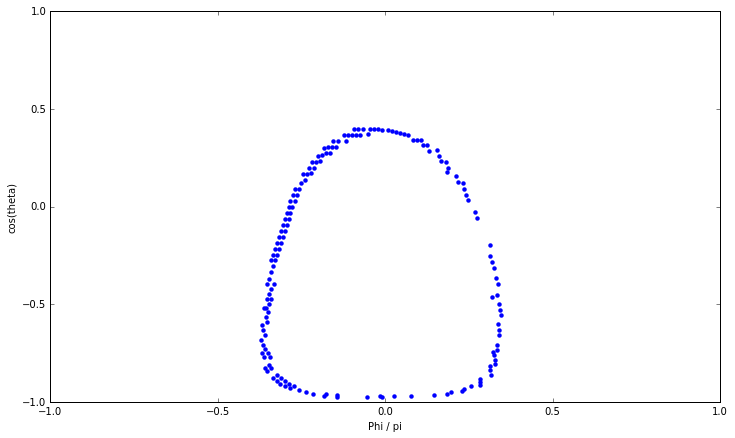

In [111]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
plt.scatter(phi[pmts_cone]/np.pi, costheta[pmts_cone],
            marker='o',lw = 0)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Phi / pi')
plt.ylabel('cos(theta)')
plt.show()